# Part 2: Binary Series Fourier Statistics Results

In [1]:
# Add directory above current directory to path
import sys; 
if not ".." in sys.path:
    sys.path.insert(0, '..')
    
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from scipy import stats

sns.set(style="darkgrid")

from utils.data_utils import *
from utils.plot_utils import tsplot_periodogram

%load_ext autoreload
%autoreload 2

#run this cell for fullscreen jupyter cells
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
def prepare_result(customer_data, result_data):
    """
    Concatenate customer base frame with entropy result frame for quick Seaborn plot building
    """
    
    dfs = [customer_data, result_data]
    
    return pd.concat(dfs, axis=1)

In [3]:
#set up data and result paths
customer_base_path = "../DATA_GYM/sanitized_customer_base.csv"
login_data_path = "../DATA_GYM/sanitized_login_data.csv"
result_folder = "../results/regularity/statistics/2020-06-02/"

In [4]:
login_data = load_login_data(login_data_path)
customer_data = load_customer_data(customer_base_path)

In [5]:
#convert the timedelta columns to floats
customer_data["CONTRACT_DURATION"] = customer_data.apply(lambda x: x.CONTRACT_DURATION / pd.Timedelta(days=1), axis=1)
customer_data["ACTIVE_DURATION"] = customer_data.apply(lambda x: x.ACTIVE_DURATION / pd.Timedelta(days=1), axis=1)

In [6]:
time_binning = "12H"
mode = "cd"
name = "binary_fourier_results"
file_ext = ".csv"
binary_fourier_stats = load_result_data(result_folder + name + "_" + time_binning + "_" + mode + file_ext)
binary_fourier_stats.describe(percentiles=np.arange(1,10) * 0.1)

Fourier_ApEn_m=2_r=0.2  Fourier_ApEn_m=3_r=0.2  \
count           138518.000000           138518.000000   
mean                 0.539478                0.429121   
std                  0.237409                0.195235   
min                  0.000006                0.000006   
10%                  0.192478                0.146437   
20%                  0.321753                0.260941   
30%                  0.426567                0.341791   
40%                  0.513987                0.402202   
50%                  0.584204                0.451668   
60%                  0.644773                0.497879   
70%                  0.699438                0.545417   
80%                  0.753202                0.598054   
90%                  0.814950                0.665534   
max                  1.093552                1.047009   

       Fourier_SampEn_m=2_r=0.2  Fourier_SampEn_m=3_r=0.2  \
count             138514.000000             138518.000000   
mean                   0.525293                  0.012601   
std                    0.274896                  0.016258   
min                    0.000600                  0.000493   
10%                    0.134017                  0.002065   
20%                    0.264485                  0.002848   
30%                    0.366858                  0.003878   
40%                    0.456598                  0.004966   
50%                    0.542778                  0.006805   
60%                    0.621802                  0.009460   
70%                    0.695953                  0.012491   
80%                    0.773086                  0.018737   
90%                    0.864526                  0.030374   
max                    3.807355                  0.099536   

       Fourier_PermEn_n=5_lag=1  Fourier_PermEn_n=7_lag=1  \
count             138518.000000             138518.000000   
mean                   0.481910                  0.399621   
std                    0.072082                  0.066742   
min                    0.008782                  0.005345   
10%                    0.409020                  0.324411   
20%                    0.454860                  0.368603   
30%                    0.473834                  0.389829   
40%                    0.485615                  0.403948   
50%                    0.494483                  0.414854   
60%                    0.502156                  0.423988   
70%                    0.509557                  0.432347   
80%                    0.517747                  0.440865   
90%                    0.530792                  0.451461   
max                    0.883653                  0.744566   

       Welch_ApEn_m=2_r=0.2  Welch_ApEn_m=3_r=0.2  Welch_SampEn_m=2_r=0.2  \
count         138518.000000         138518.000000           138518.000000   
mean               0.785771              0.584413                0.826050   
std                0.393184              0.272847                0.496418   
min                0.000000              0.000000                0.000000   
10%                0.122152              0.084675                0.099728   
20%                0.435248              0.344373                0.362509   
30%                0.617320              0.490635                0.534771   
40%                0.739144              0.607335                0.684552   
50%                0.849222              0.683729                0.818449   
60%                0.956282              0.734486                0.958435   
70%                1.056706              0.773817                1.111453   
80%                1.150857              0.810575                1.280920   
90%                1.246889              0.854415                1.492654   
max                1.752850              1.149498                2.765535   

       Welch_SampEn_m=3_r=0.2  Welch_PermEn_n=5_lag=1  Welch_PermEn_n=7_lag=1  
count           138518.000000           138518.000000           138518.000000  
mea

In [7]:
binfourier_result = prepare_result(customer_data, binary_fourier_stats)

In [8]:
binfourier_result.corr()

ISACTIVE  CONTRACT_DURATION  ACTIVE_DURATION  \
ISACTIVE                  1.000000           0.378390         0.264010   
CONTRACT_DURATION         0.378390           1.000000         0.869054   
ACTIVE_DURATION           0.264010           0.869054         1.000000   
NUM_VISITS                0.236973           0.527056         0.646870   
Fourier_ApEn_m=2_r=0.2   -0.040295          -0.078614        -0.025429   
Fourier_ApEn_m=3_r=0.2    0.017000           0.042106         0.087651   
Fourier_SampEn_m=2_r=0.2 -0.141614          -0.304025        -0.210798   
Fourier_SampEn_m=3_r=0.2 -0.224999          -0.536606        -0.440412   
Fourier_PermEn_n=5_lag=1  0.010368           0.078015         0.172515   
Fourier_PermEn_n=7_lag=1  0.079320           0.226030         0.317065   
Welch_ApEn_m=2_r=0.2      0.055132           0.114582         0.154048   
Welch_ApEn_m=3_r=0.2      0.088119           0.186828         0.246834   
Welch_SampEn_m=2_r=0.2    0.041031           0.097533         0.121211   
Welch_SampEn_m=3_r=0.2   -0.043839          -0.207883        -0.110862   
Welch_PermEn_n=5_lag=1    0.118030           0.240080         0.294902   
Welch_PermEn_n=7_lag=1    0.128077           0.259035         0.319497   

                          NUM_VISITS  Fourier_ApEn_m=2_r=0.2  \
ISACTIVE                    0.236973               -0.040295   
CONTRACT_DURATION           0.527056               -0.078614   
ACTIVE_DURATION             0.646870               -0.025429   
NUM_VISITS                  1.000000               -0.222815   
Fourier_ApEn_m=2_r=0.2     -0.222815                1.000000   
Fourier_ApEn_m=3_r=0.2     -0.135202                0.965328   
Fourier_SampEn_m=2_r=0.2   -0.315283                0.865338   
Fourier_SampEn_m=3_r=0.2   -0.292375               -0.190145   
Fourier_PermEn_n=5_lag=1    0.174356                0.068349   
Fourier_PermEn_n=7_lag=1    0.284828                0.172217   
Welch_ApEn_m=2_r=0.2       -0.037707                0.764629   
Welch_ApEn_m=3_r=0.2        0.077944                0.663862   
Welch_SampEn_m=2_r=0.2     -0.090261                0.772998   
Welch_SampEn_m=3_r=0.2      0.140807               -0.074152   
Welch_PermEn_n=5_lag=1      0.269174                0.233968   
Welch_PermEn_n=7_lag=1      0.291997                0.269352   

                          Fourier_ApEn_m=3_r=0.2  Fourier_SampEn_m=2_r=0.2  \
ISACTIVE                                0.017000                 -0.141614   
CONTRACT_DURATION                       0.042106                 -0.304025   
ACTIVE_DURATION                         0.087651                 -0.210798   
NUM_VISITS                             -0.135202                 -0.315283   
Fourier_ApEn_m=2_r=0.2                  0.965328                  0.865338   
Fourier_ApEn_m=3_r=0.2                  1.000000                  0.765625   
Fourier_SampEn_m=2_r=0.2                0.765625                  1.000000   
Fourier_SampEn_m=3_r=0.2               -0.313130                  0.206399   
Fourier_PermEn_n=5_lag=1                0.130413                  0.019962   
Fourier_PermEn_n=7_lag=1                0.262412                  0.043934   
Welch_ApEn_m=2_r=0.2                    0.794910                  0.589460   
Welch_ApEn_m=3_r=0.2                    0.708826                  0.461404   
Welch_SampEn_m=2_r=0.2                  0.798714                  0.616822   
Welch_SampEn_m=3_r=0.2                 -0.091131                 -0.016584   
Welch_PermEn_n=5_lag=1                  0.323740                  0.026906   
Welch_PermEn_n=7_lag=1                  0.363653                  0.052202   

                          Fourier_SampEn_m=3_r=0.2  Fourier_PermEn_n=5_lag=1  \
ISACTIVE                                 -0.224999                  0.010368   
CONTRACT_DURATION                        -0.536606                  0.078015   
ACTIVE_DURATION                          -0.440412                  0.172515   
NUM_VISITS                     

In [9]:
cd_normalizer = colors.LogNorm(vmin=binfourier_result["CONTRACT_DURATION"].min(), vmax=binfourier_result["CONTRACT_DURATION"].max())
nv_normalizer = colors.LogNorm(vmin=binfourier_result["NUM_VISITS"].min(), vmax=binfourier_result["NUM_VISITS"].max())

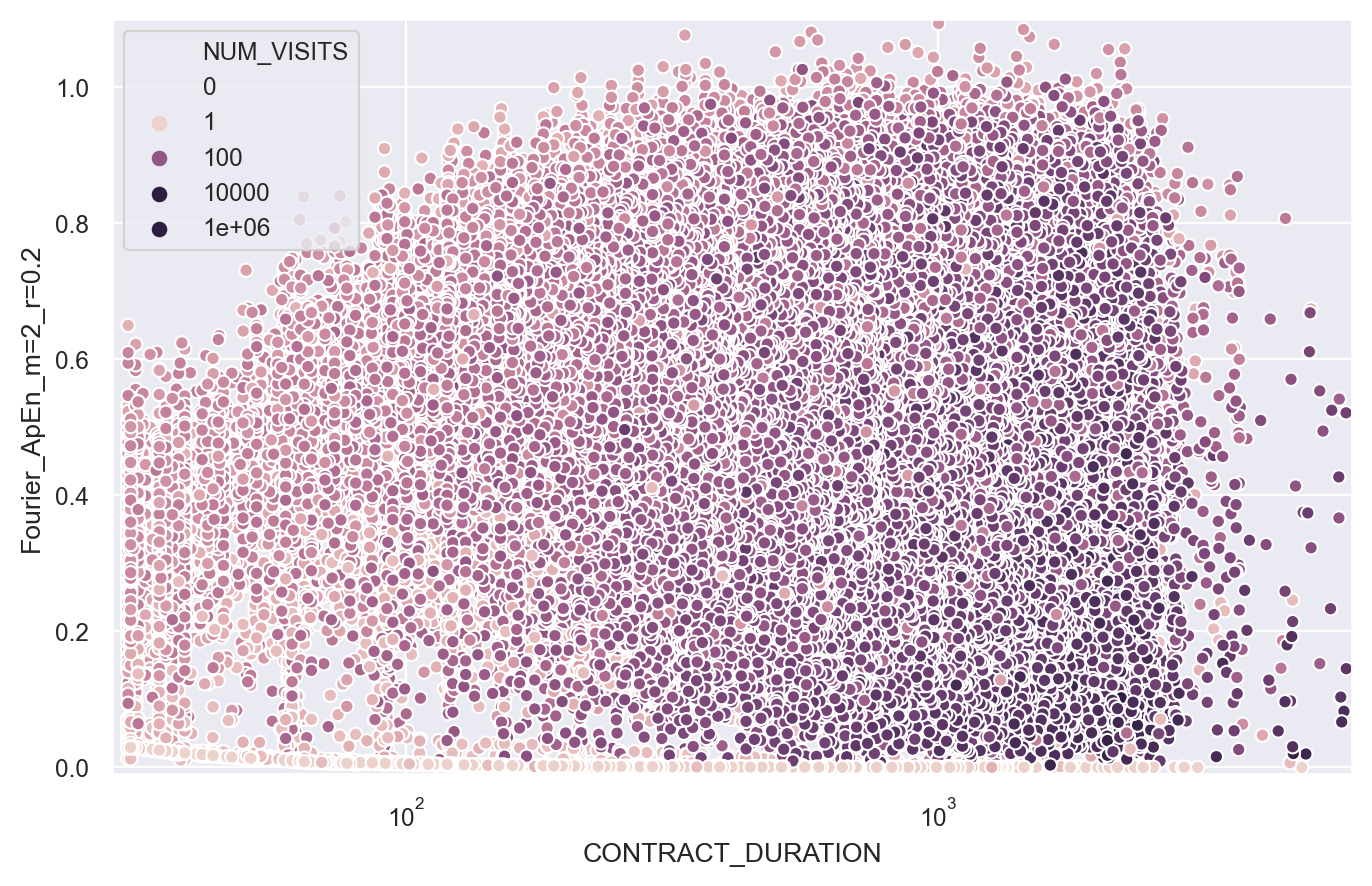

In [10]:
with sns.plotting_context("paper"):
    fig1, ax1 = plt.subplots(figsize=(8,5), dpi=200)

    ax1.set(xscale="log", xlim=(28, 6000), ylim=(-0.01,1.1))
    sns.scatterplot(x="CONTRACT_DURATION", y="Fourier_ApEn_m=2_r=0.2", hue="NUM_VISITS", hue_norm=nv_normalizer, data=binfourier_result, ax=ax1, rasterized=True)

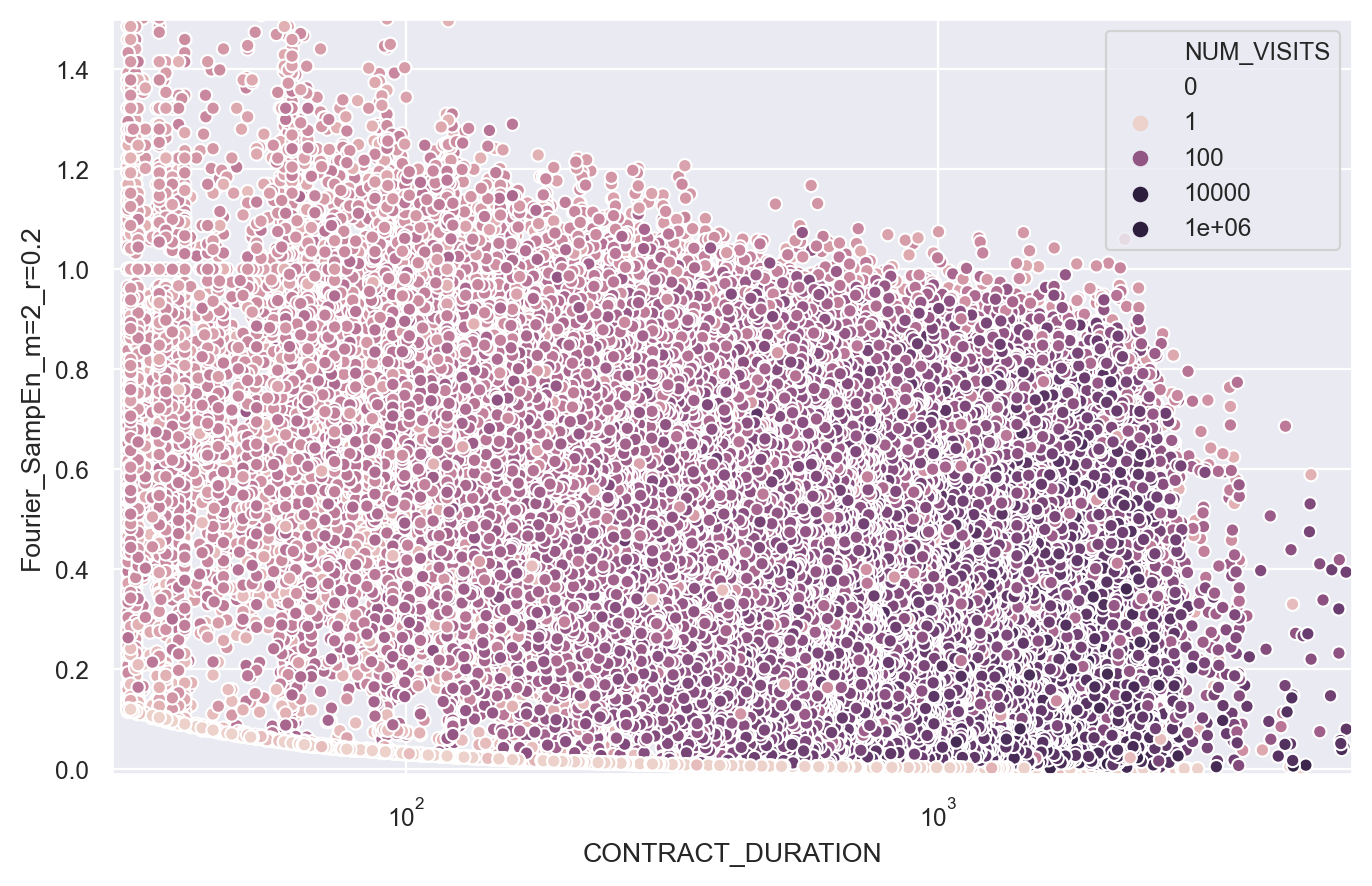

In [12]:
with sns.plotting_context("paper"):
    fig2, ax2 = plt.subplots(figsize=(8,5), dpi=200)

    ax2.set(xscale="log", xlim=(28, 6000), ylim=(-0.01,1.5))
    sns.scatterplot(x="CONTRACT_DURATION", y="Fourier_SampEn_m=2_r=0.2", hue="NUM_VISITS", hue_norm=nv_normalizer, data=binfourier_result, ax=ax2, rasterized=True)

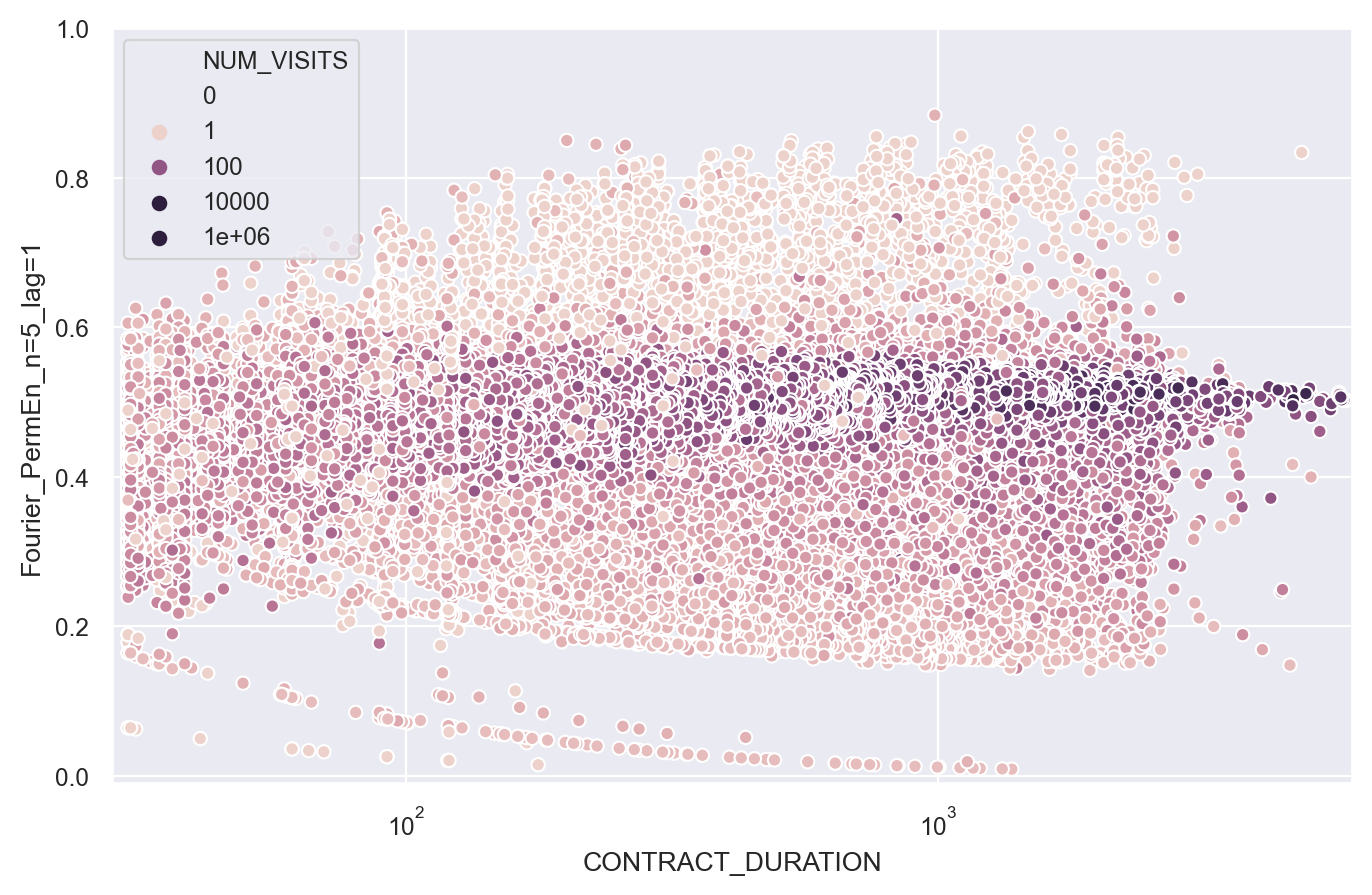

In [13]:
with sns.plotting_context("paper"):
    fig3, ax3 = plt.subplots(figsize=(8,5), dpi=200)

    ax3.set(xscale="log", xlim=(28, 6000), ylim=(-0.01,1.0))
    sns.scatterplot(x="CONTRACT_DURATION", y="Fourier_PermEn_n=5_lag=1", hue="NUM_VISITS", hue_norm=nv_normalizer, data=binfourier_result, ax=ax3, rasterized=True)

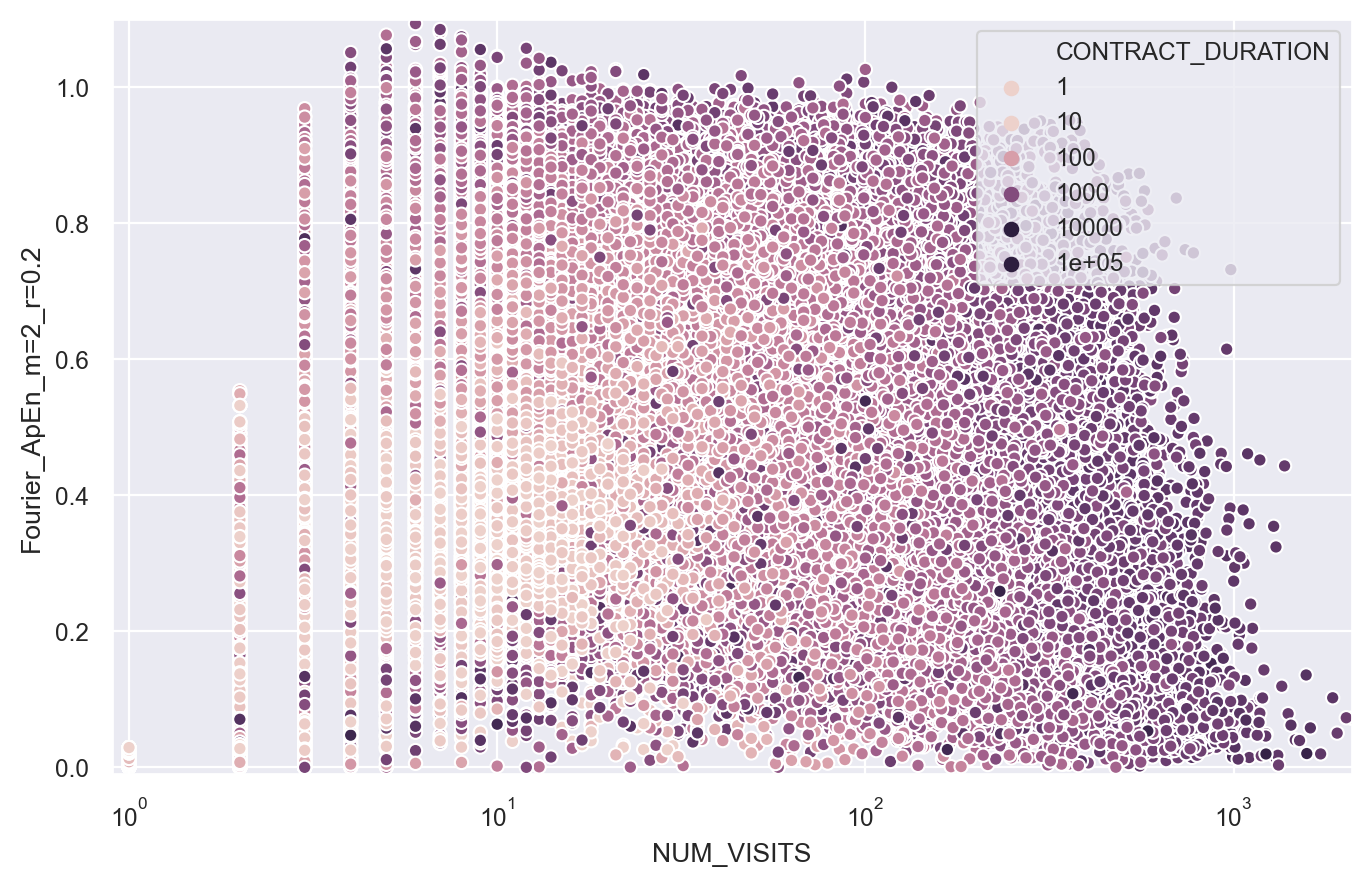

In [14]:
with sns.plotting_context("paper"):
    fig4, ax4 = plt.subplots(figsize=(8,5), dpi=200)

    ax4.set(xscale="log", xlim=(0.9, 2100), ylim=(-0.01,1.1))
    sns.scatterplot(x="NUM_VISITS", y="Fourier_ApEn_m=2_r=0.2", hue="CONTRACT_DURATION", hue_norm=cd_normalizer, data=binfourier_result, ax=ax4, rasterized=True)

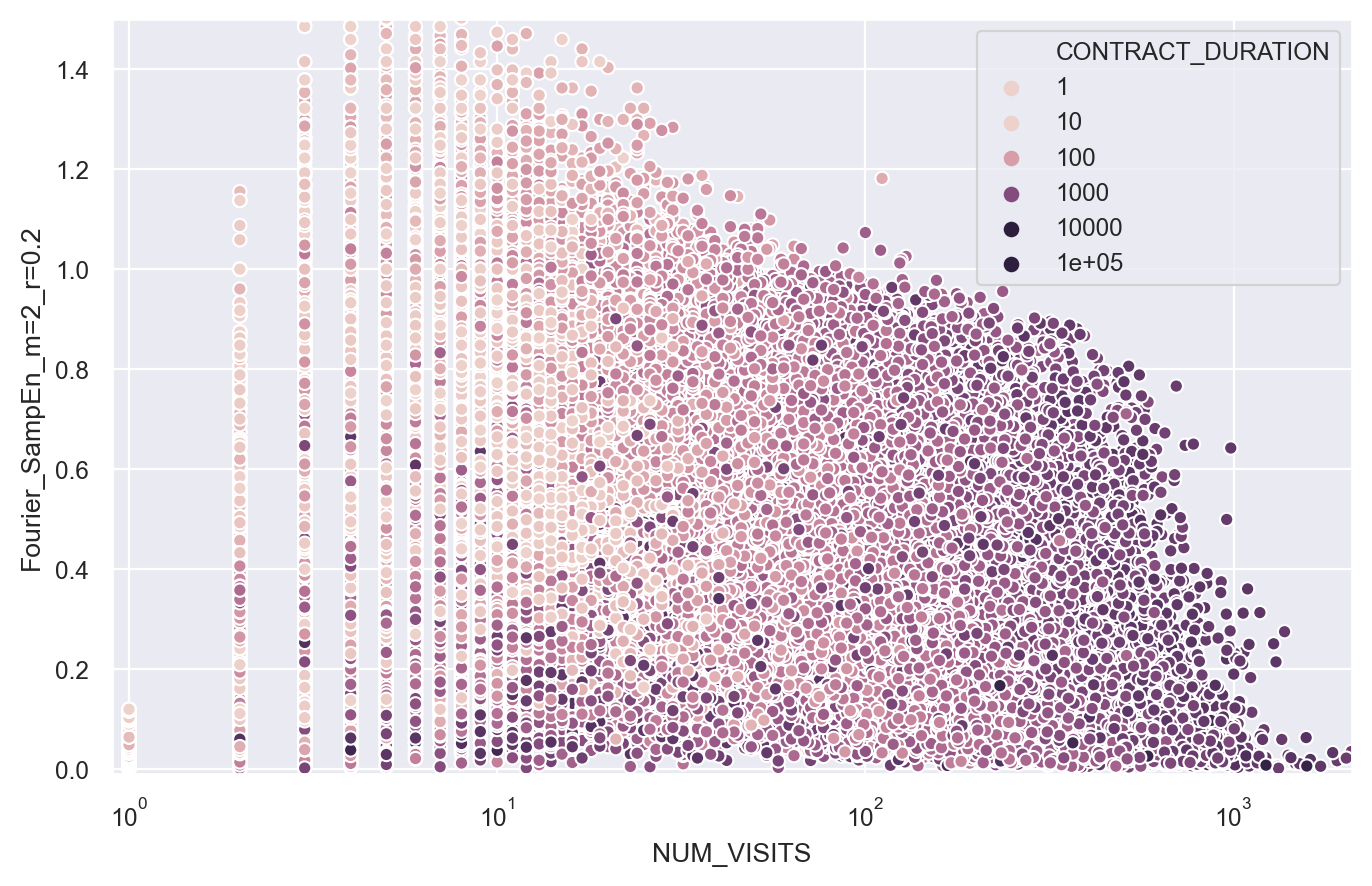

In [15]:
with sns.plotting_context("paper"):
    fig5, ax5 = plt.subplots(figsize=(8,5), dpi=200)

    ax5.set(xscale="log", xlim=(0.9, 2100), ylim=(-0.01,1.5))
    sns.scatterplot(x="NUM_VISITS", y="Fourier_SampEn_m=2_r=0.2", hue="CONTRACT_DURATION", hue_norm=cd_normalizer, data=binfourier_result, ax=ax5, rasterized=True)

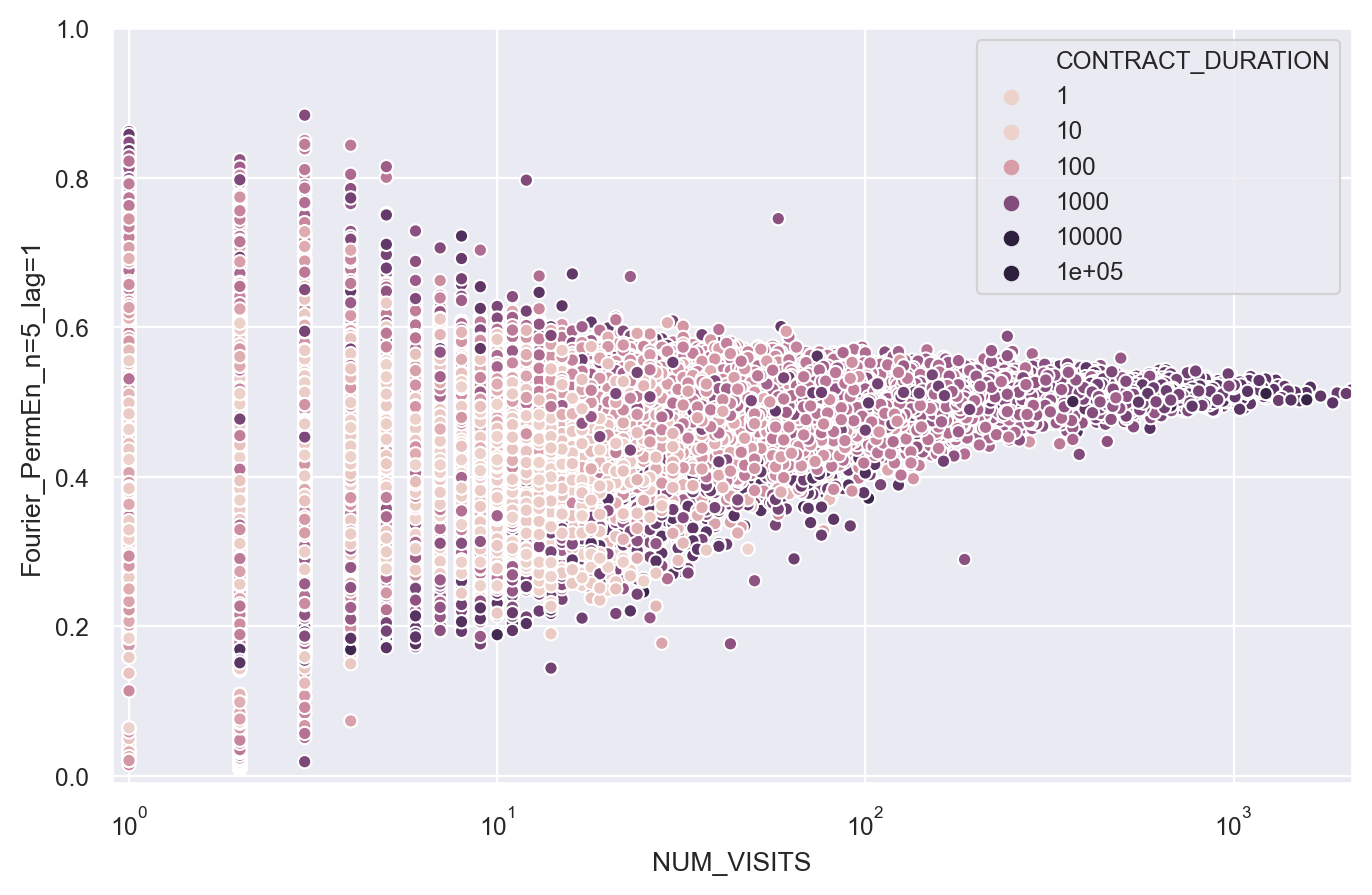

In [16]:
with sns.plotting_context("paper"):
    fig6, ax6 = plt.subplots(figsize=(8,5), dpi=200)

    ax6.set(xscale="log", xlim=(0.9, 2100), ylim=(-0.01,1.0))
    sns.scatterplot(x="NUM_VISITS", y="Fourier_PermEn_n=5_lag=1", hue="CONTRACT_DURATION", hue_norm=cd_normalizer, data=binfourier_result, ax=ax6, rasterized=True)

In [17]:
fig1.savefig("../plots/result_plots/f_apen_cd.pdf", format='pdf', bbox_inches='tight')
fig2.savefig("../plots/result_plots/f_sampen_cd.pdf", format='pdf', bbox_inches='tight')
fig3.savefig("../plots/result_plots/f_permen_cd.pdf", format='pdf', bbox_inches='tight')
fig4.savefig("../plots/result_plots/f_apen_nv.pdf", format='pdf', bbox_inches='tight')
fig5.savefig("../plots/result_plots/f_sampen_nv.pdf", format='pdf', bbox_inches='tight')
fig6.savefig("../plots/result_plots/f_permen_nv.pdf", format='pdf', bbox_inches='tight')

In [13]:
cd_normalizer = colors.LogNorm(vmin=binfourier_result["CONTRACT_DURATION"].min(), vmax=binfourier_result["CONTRACT_DURATION"].max())
nv_normalizer = colors.LogNorm(vmin=binfourier_result["NUM_VISITS"].min(), vmax=binfourier_result["NUM_VISITS"].max())

In [37]:
stat_name = "NUM_VISITS"
n = 1000
sample = binfourier_result.nlargest(n, stat_name).sample(1)
sample_code = sample.index[0]
print(sample[stat_name])
print(sample_code)

4043.10    585
Name: NUM_VISITS, dtype: int64
4043.10


In [38]:
fs = 4.0
classical_config = {"fs": fs, "window": "hann", "window_size": 7*4, "detrend": "constant", "scaling": "density", "mode": "none"}
welch_config = {"fs": fs, "window": "hann", "nperseg": 512, "noverlap": None, "nfft": 1024, "detrend": "constant", "scaling": "density"}

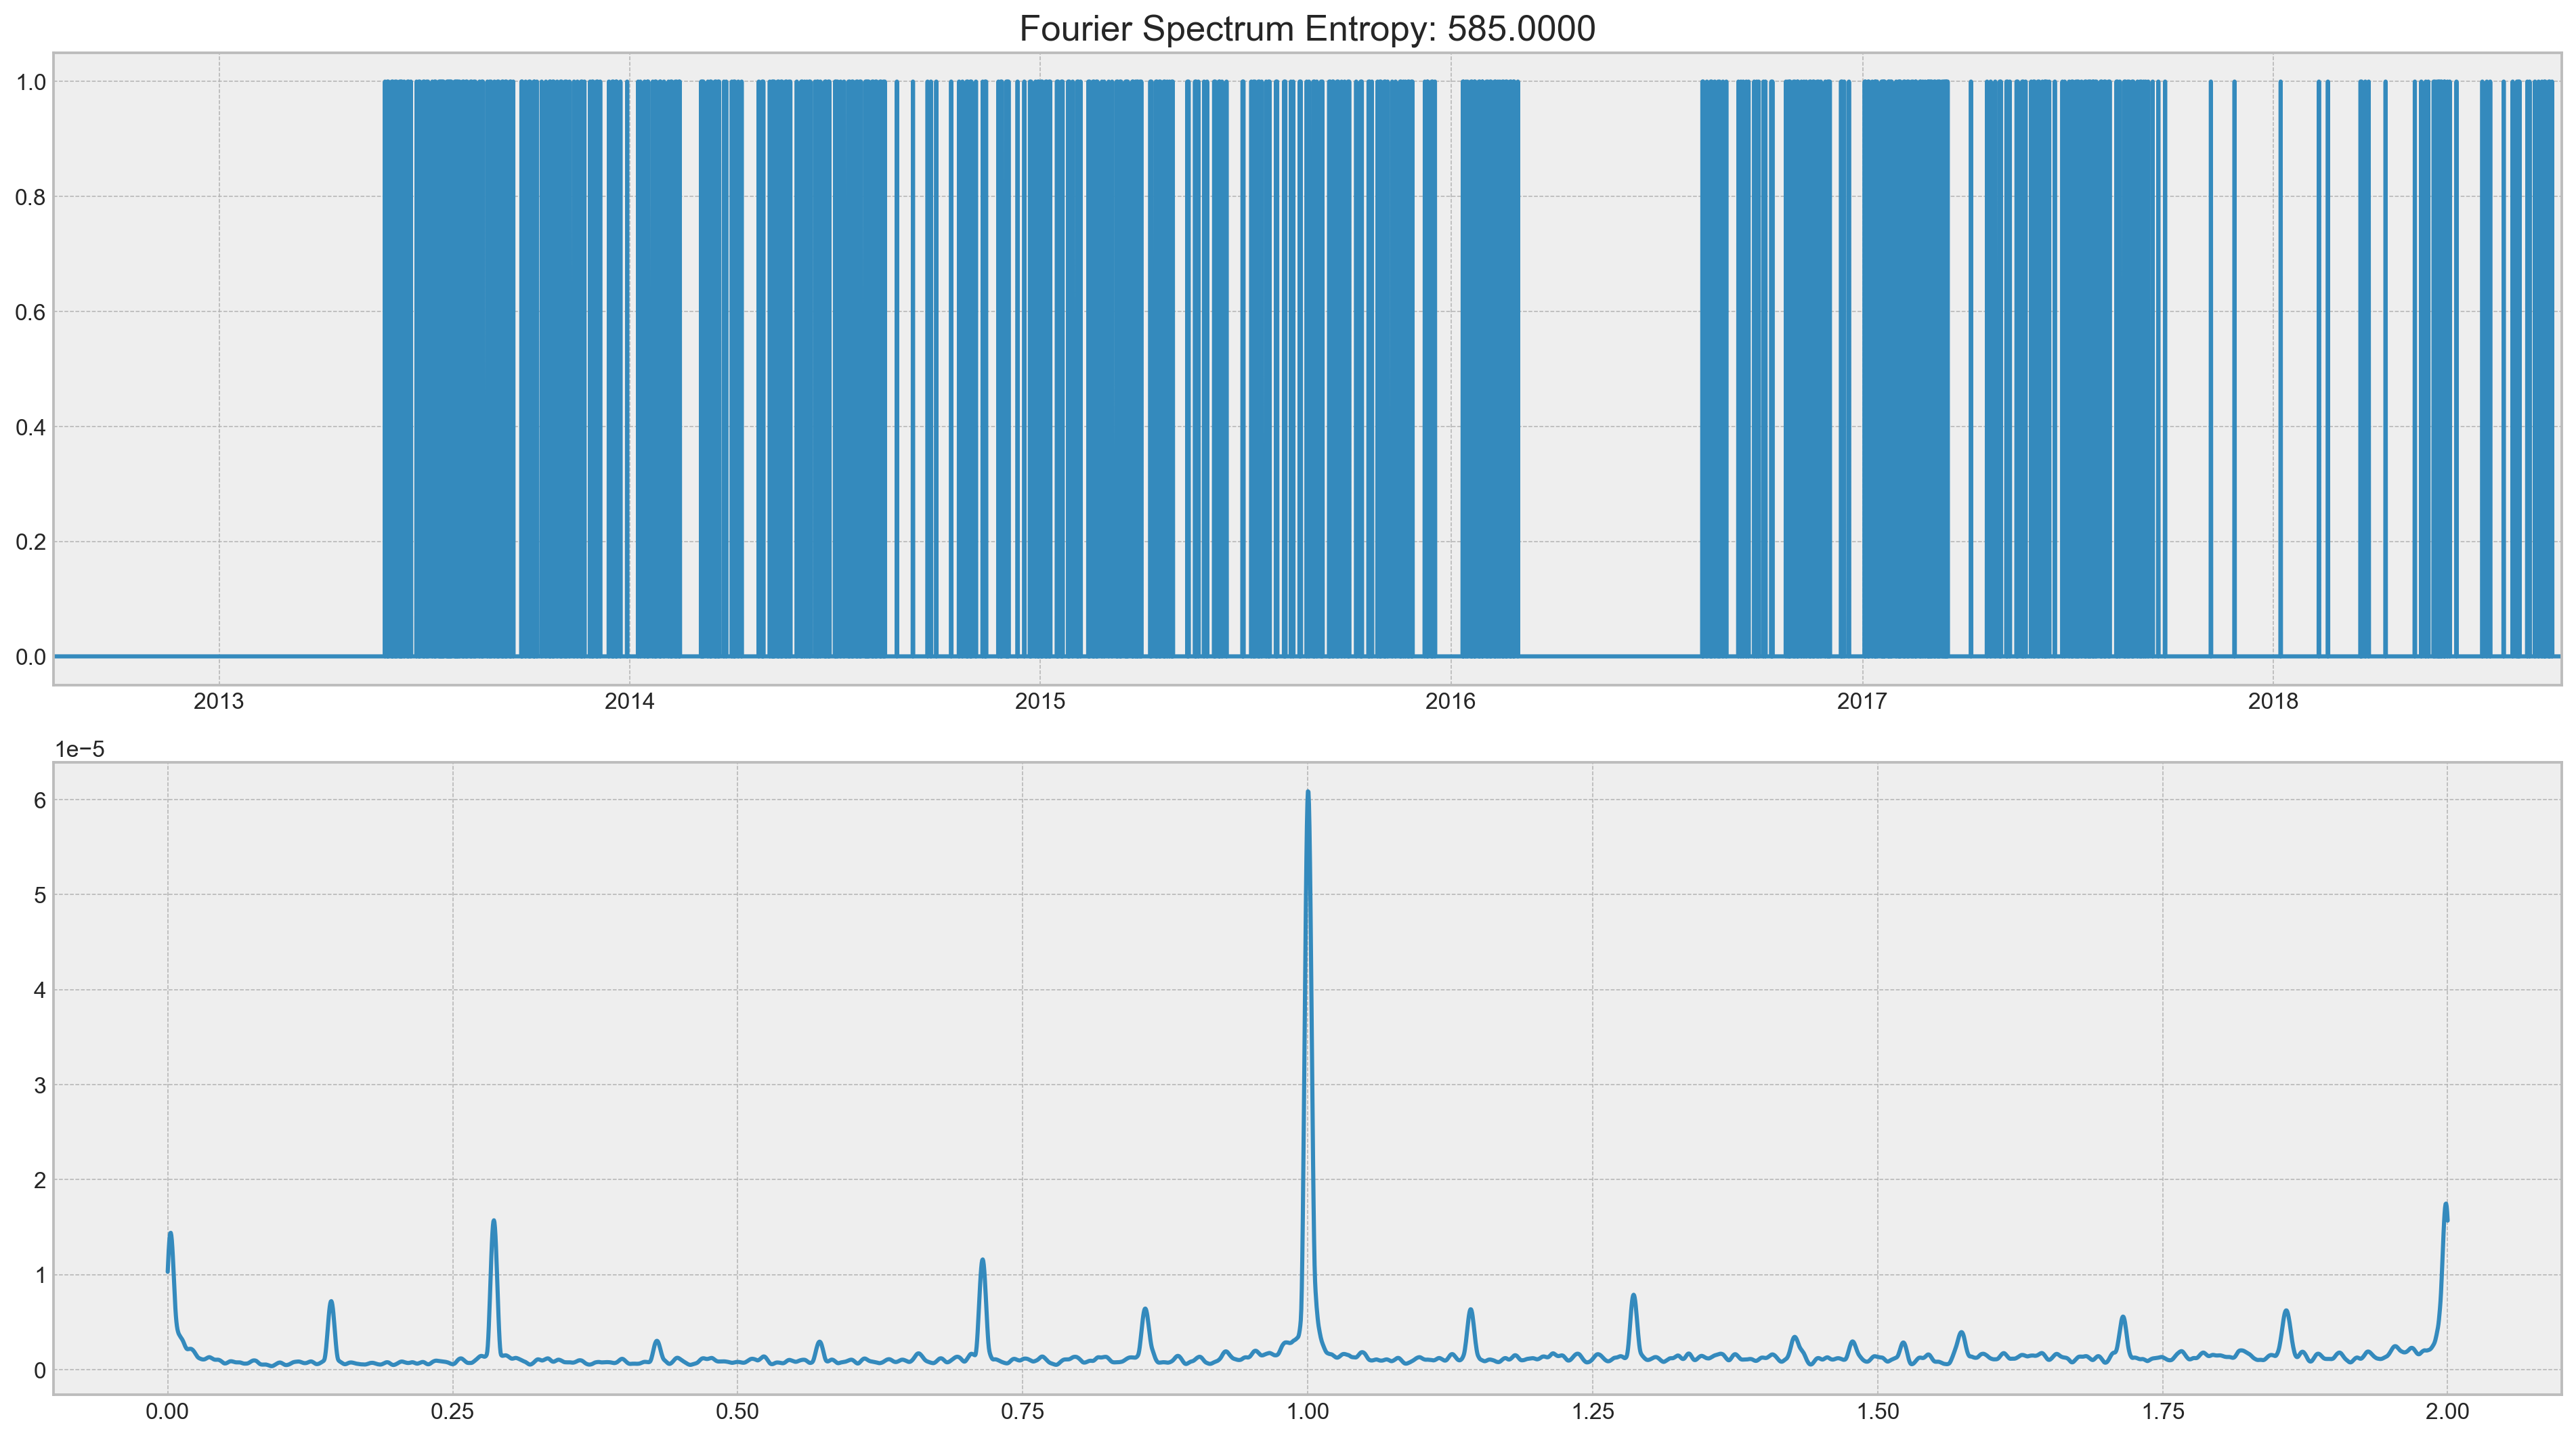

In [39]:
tsplot_periodogram(sample_code, binfourier_result, login_data, stat_name, freq="6H", p_type="classical", **classical_config)